<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-151/blob/main/Actividad_Semanal_4_code_11102022_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
DatosActividad4 = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

In [4]:
TablaDatos4 = pd.read_csv(DatosActividad4, index_col = 0)
TablaDatos4.index.name = None
TablaDatos4.dropna(axis=0,inplace=True)
TablaDatos4.head

<bound method NDFrame.head of            X1   X2   X3   X4    X5   X6   X7   X8   X9  X10  ...      X15  \
1       20000  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0 -2.0  ...      0.0   
2      120000  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  0.0  ...   3272.0   
3       90000  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  0.0  ...  14331.0   
4       50000  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  0.0  ...  28314.0   
5       50000  1.0  2.0  1.0  57.0 -1.0  0.0 -1.0  0.0  0.0  ...  20940.0   
...       ...  ...  ...  ...   ...  ...  ...  ...  ...  ...  ...      ...   
29996  220000  1.0  3.0  1.0  39.0  0.0  0.0  0.0  0.0  0.0  ...  88004.0   
29997  150000  1.0  3.0  2.0  43.0 -1.0 -1.0 -1.0 -1.0  0.0  ...   8979.0   
29998   30000  1.0  2.0  2.0  37.0  4.0  3.0  2.0 -1.0  0.0  ...  20878.0   
29999   80000  1.0  3.0  1.0  41.0  1.0 -1.0  0.0  0.0  0.0  ...  52774.0   
30000   50000  1.0  2.0  1.0  46.0  0.0  0.0  0.0  0.0  0.0  ...  36535.0   

           X16      X17      X18      X19    

In [ ]:
min(TablaDatos4.index.to_list())

1

In [ ]:
TablaDatos4.shape

(29958, 24)

In [ ]:
TD4=TablaDatos4


In [ ]:
TD4.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [ ]:
TD4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29958 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      29958 non-null  int64  
 1   X2      29958 non-null  float64
 2   X3      29958 non-null  float64
 3   X4      29958 non-null  float64
 4   X5      29958 non-null  float64
 5   X6      29958 non-null  float64
 6   X7      29958 non-null  float64
 7   X8      29958 non-null  float64
 8   X9      29958 non-null  float64
 9   X10     29958 non-null  float64
 10  X11     29958 non-null  float64
 11  X12     29958 non-null  float64
 12  X13     29958 non-null  float64
 13  X14     29958 non-null  float64
 14  X15     29958 non-null  float64
 15  X16     29958 non-null  float64
 16  X17     29958 non-null  float64
 17  X18     29958 non-null  float64
 18  X19     29958 non-null  float64
 19  X20     29958 non-null  float64
 20  X21     29958 non-null  float64
 21  X22     29958 non-null  float64
 22

In [ ]:
nTD4 = TD4.iloc[1:22]
nTD4.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
X1,1.000000,0.014543,-0.294293,0.013257,0.210578,-0.161769,-0.070084,-0.141342,-0.290065,-0.362221,...,0.483831,0.458894,0.514708,0.542569,0.393291,0.475961,0.491864,0.267976,0.271330,-0.300531
X2,0.014543,1.000000,0.423415,0.093495,-0.168496,0.139923,-0.035731,-0.115327,-0.053664,-0.126155,...,-0.372416,-0.327846,-0.433092,-0.283189,-0.408214,-0.416663,-0.374797,-0.307825,-0.181076,-0.021926
X3,-0.294293,0.423415,1.000000,0.078708,-0.141848,-0.087125,0.176433,0.157091,-0.025274,0.051059,...,-0.315866,-0.290294,-0.385854,-0.402062,-0.290513,-0.403970,-0.344091,-0.283697,-0.122817,-0.078095
X4,0.013257,0.093495,0.078708,1.000000,-0.519808,0.287804,0.256231,-0.015467,0.123335,0.153333,...,0.068682,0.115256,-0.028049,0.033870,-0.213794,-0.314650,-0.127334,-0.353012,-0.222547,-0.010660
X5,0.210578,-0.168496,-0.141848,-0.519808,1.000000,-0.488675,-0.242630,-0.322463,-0.385483,-0.411155,...,-0.116958,-0.149688,-0.011369,0.087048,0.435848,0.381424,0.543562,0.348968,0.344352,-0.323103
X6,-0.161769,0.139923,-0.087125,0.287804,-0.488675,1.000000,0.309977,0.369477,0.494218,0.414821,...,0.114764,0.087818,0.098116,-0.030974,-0.171553,-0.023423,-0.336095,0.024941,0.043346,0.190216
X7,-0.070084,-0.035731,0.176433,0.256231,-0.242630,0.309977,1.000000,0.580035,0.466824,0.402875,...,0.094651,0.058580,0.063646,-0.039964,-0.000693,0.023335,-0.217049,0.013667,0.024642,0.346290
X8,-0.141342,-0.115327,0.157091,-0.015467,-0.322463,0.369477,0.580035,1.000000,0.627506,0.586979,...,0.075164,0.040608,0.042686,0.013915,-0.178251,-0.018289,-0.291971,0.018657,0.006380,0.308327
X9,-0.290065,-0.053664,-0.025274,0.123335,-0.385483,0.494218,0.466824,0.627506,1.000000,0.976115,...,0.098479,0.112315,0.037086,-0.003333,0.014682,-0.168626,-0.330437,-0.184630,-0.109776,0.461681
X10,-0.362221,-0.126155,0.051059,0.153333,-0.411155,0.414821,0.402875,0.586979,0.976115,1.000000,...,0.084273,0.106843,0.022955,-0.028424,-0.012048,-0.204161,-0.297603,-0.211809,-0.142869,0.467477


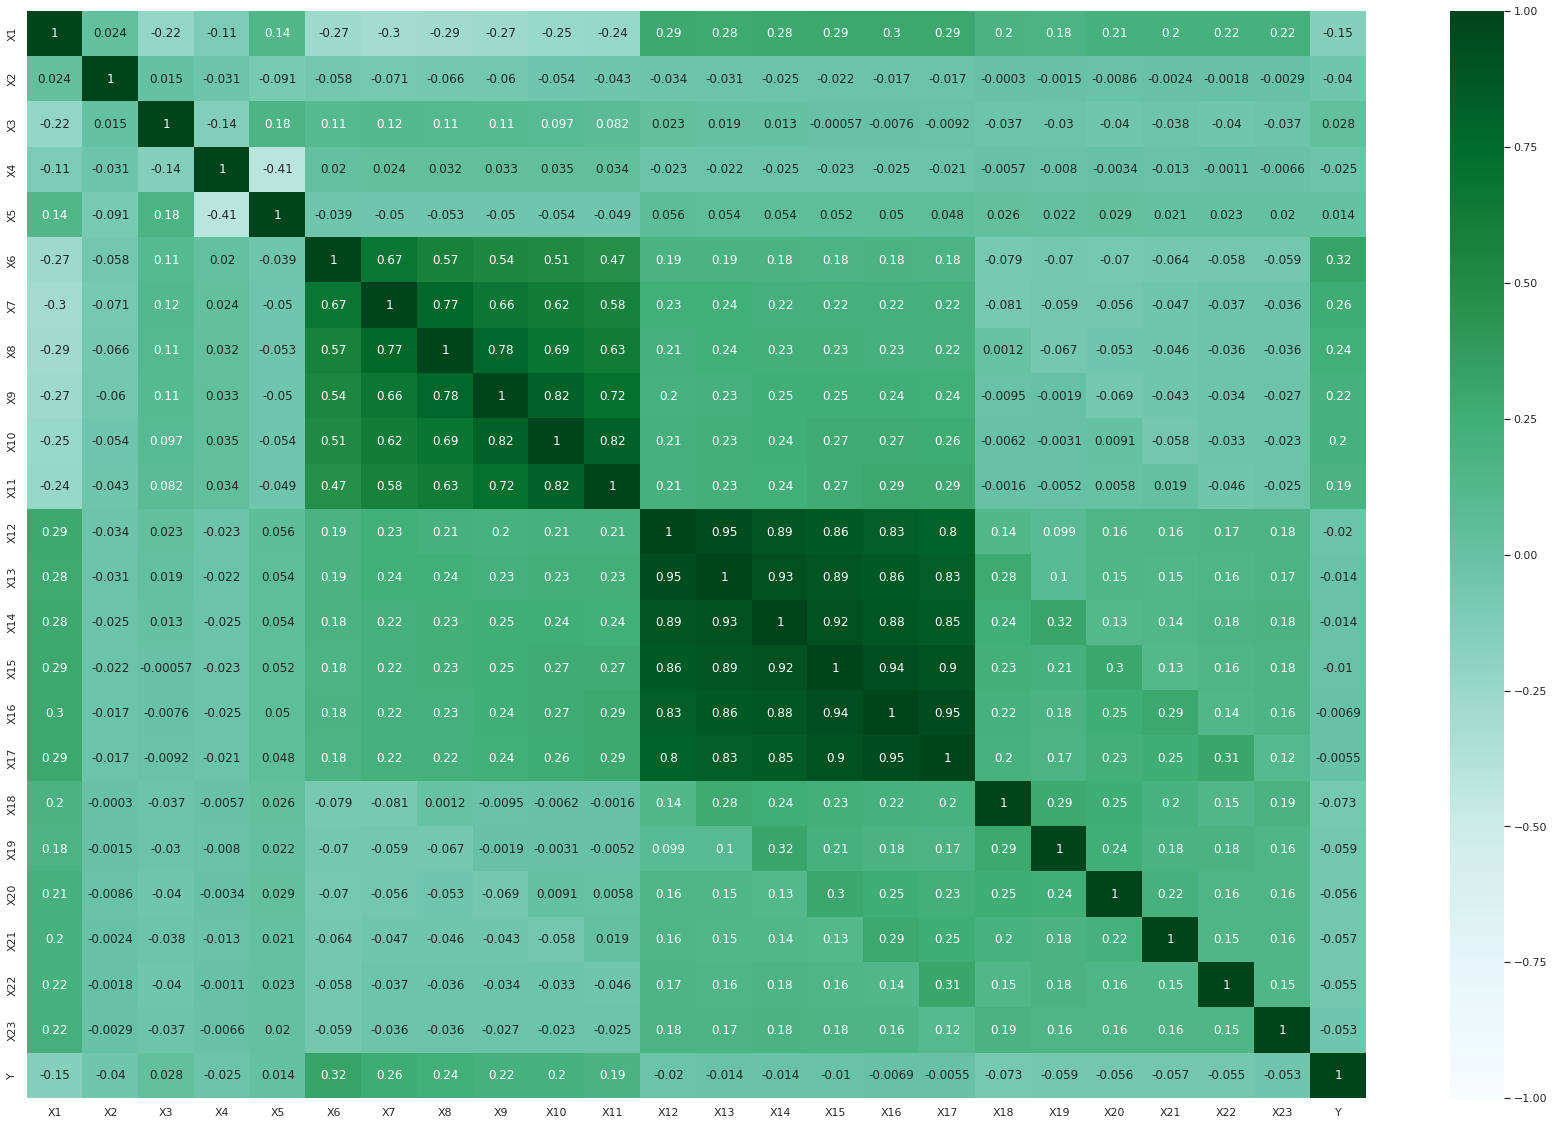

In [ ]:
import seaborn as sns
corrs=TD4.corr()

sns.set(rc={'figure.figsize':(30,20)})
sns.heatmap(corrs,vmin=-1, vmax =1, cmap ='BuGn', annot=True)



In [ ]:
cols=["X1","X2","X3"]
#cols=TD4.iloc[1:22]
summary ={
    "Varianzas":nTD4[cols].var(),
    "Valor Min":nTD4[cols].min(),
    "Valor Max":nTD4[cols].max()
}
pd.DataFrame(summary, index=cols).transpose()


,X1,X2,X3
Varianzas,2.494143e+10,0.247619,0.590476
Valor Min,2.000000e+04,1.000000,1.000000
Valor Max,6.300000e+05,2.000000,3.000000


In [ ]:
# Aquí va la varianza total de toda la tabla ...creo
t = nTD4.var().sum()
#Ahora las varianzas de las tre variables que estamos analizando ... casi seguro

varX1=nTD4.X1.var()
varX2=nTD4.X2.var()
varX3=nTD4.X3.var()
#Ahora el porcentaje que cada varianza representa respecto al total de todas las varianzas

a1=('Total Varianza \t\t:', t.round(2) )
a2=('Varianza de X1 \t:', ((varX1/t)*100).round(2),'%' )
a3=('Varianza de X2 \t:', ((varX2/t)*100).round(2),'%' )
a4=('Varianza de X3 \t:', ((varX3/t)*100).round(2),'%' )


In [ ]:
 #La X1 parece que representa la mayoria de la varianzas, como peso de la varianza de todos los datos, pero también tiene un espacio entre
 #su minimo y su maximo muy alto, entonces se deben escalar los datos, para normalizar las observaciones.
 
 from sklearn.preprocessing import StandardScaler


In [ ]:
scaler = StandardScaler()
scaled = scaler.fit_transform(nTD4)

scaled[:5]

array([[-0.27807196,  0.78446454,  0.12700013,  0.38138504, -0.90602883,
        -1.04276047,  1.95859633,  0.04055536,  0.19900744,  0.16081688,
         1.60815231, -0.57054704, -0.52279125, -0.49826054, -0.37836578,
        -0.3596176 , -0.41966423, -0.46325665, -0.42890413, -0.36167903,
        -0.59938765, -0.26734705, -0.29706039,  1.78885438],
       [-0.47272234,  0.78446454,  0.12700013,  0.38138504, -0.03124237,
         0.10976426,  0.04554875,  0.04055536,  0.19900744,  0.16081688,
        -0.03922323, -0.26977792, -0.39459735, -0.38686269, -0.28056116,
        -0.24503309, -0.30144245, -0.33696363, -0.38342762, -0.36167903,
        -0.59938765, -0.24317045, -0.05458096, -0.55901699],
       [-0.73225617,  0.78446454,  0.12700013, -1.6208864 ,  0.29680255,
         0.10976426,  0.04554875,  0.04055536,  0.19900744,  0.16081688,
        -0.03922323, -0.06874043, -0.03815121, -0.02090993, -0.15689699,
        -0.10534427, -0.16676891, -0.29686268, -0.336223  , -0.35016775,
  

In [ ]:
#Hay que convertir esto en una tabla más entendible, donde usemos los titulos de columna originales

scaled_df = pd.DataFrame(scaled, columns=nTD4.columns)

In [ ]:
scaled_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,-0.278072,0.784465,0.127000,0.381385,-0.906029,-1.042760,1.958596,0.040555,0.199007,0.160817,...,-0.378366,-0.359618,-0.419664,-0.463257,-0.428904,-0.361679,-0.599388,-0.267347,-0.297060,1.788854
1,-0.472722,0.784465,0.127000,0.381385,-0.031242,0.109764,0.045549,0.040555,0.199007,0.160817,...,-0.280561,-0.245033,-0.301442,-0.336964,-0.383428,-0.361679,-0.599388,-0.243170,-0.054581,-0.559017
2,-0.732256,0.784465,0.127000,-1.620886,0.296803,0.109764,0.045549,0.040555,0.199007,0.160817,...,-0.156897,-0.105344,-0.166769,-0.296863,-0.336223,-0.350168,-0.585318,-0.241502,-0.377887,-0.559017
3,-0.732256,-1.274755,0.127000,-1.620886,2.483769,-1.042760,0.045549,-0.811107,0.199007,0.160817,...,-0.222112,-0.203179,-0.266980,-0.296863,2.816391,0.156329,0.526210,-0.250689,-0.403832,-0.559017
4,-0.732256,-1.274755,-1.206501,0.381385,0.296803,0.109764,0.045549,0.040555,0.199007,0.160817,...,-0.235785,-0.198464,-0.258389,-0.255264,-0.354777,-0.381421,-0.599388,-0.243170,-0.394052,-0.559017


In [ ]:
# Ahora se supone que todos los valores estan en una misma escala, aunque guardan su "significancia" que ya tenían al ser observaciones propias

summary = {
"Varianzas": scaled_df[cols].var()[0:3],
"Valor Min": scaled_df[cols].min()[0:3],
"Valor Max": scaled_df[cols].max()[0:3]
}


In [ ]:
pd.DataFrame(summary, index = cols).transpose()
# Aquí aunque son los mismos datos, ya no parecen varianzas tan diferentes y las observaiones ya no estan tan separadas entre minimos y maximos

,X1,X2,X3
Varianzas,1.050000,1.050000,1.050000
Valor Min,-0.926907,-1.274755,-1.206501
Valor Max,3.030984,0.784465,1.460501


In [ ]:
# Se supone que ahora si se puede aplicar PCA

from sklearn.decomposition import PCA

pcs =PCA()

In [ ]:
# Esto es para limpiar valores vacios:

pcs_t = pcs.fit_transform(scaled_df)

pcs_t[:5]

array([[-1.90037137e+00,  1.61954681e+00,  3.38878822e-01,
         6.87976450e-01, -1.13519407e-01,  1.97432017e+00,
        -1.48126281e-01,  1.33615647e+00,  6.55546685e-01,
         5.19700292e-01,  6.23821255e-01,  9.54920781e-01,
        -3.82308199e-01,  1.17926755e-01,  2.80755729e-01,
         1.05137476e-01,  4.91095070e-02, -4.62818759e-02,
        -3.73670465e-03,  3.70042913e-03,  5.80365121e-17],
       [-1.28824236e+00,  7.07782723e-02, -1.90207380e-01,
        -5.21872981e-01, -1.77899315e-01, -5.57402460e-02,
        -6.05111379e-02, -5.82330140e-01, -5.01728200e-02,
        -1.33199765e-02, -1.44256129e-01,  5.62704680e-01,
        -4.17555356e-02,  1.31874917e-01, -2.06419028e-01,
         2.34830339e-01, -3.35449305e-02,  7.53813985e-02,
        -5.18651247e-02, -6.69439810e-03,  5.80365121e-17],
       [-8.46611144e-01, -1.49649132e-01,  2.84236723e-01,
         1.35443907e-01, -7.42658905e-01, -1.11646129e+00,
        -8.80858579e-01,  8.05624143e-02, -1.34907950e

In [ ]:
#De los datos arriba lo importente es identificar:
#El % de varianza explicada por cada componente
#El acumulado de la varianza explicaa por cada componente, osea varx1+varx2+varx3+...varnxN

In [ ]:
pcsSummary_df = pd.DataFrame({
                              '% varianza explicada': np.round(pcs.explained_variance_ratio_,4) * 100, # ¿Cuáles fórmulas aplican para esta columna?
                              '% varianza acumulada': np.cumsum(pcs.explained_variance_ratio_) * 100 #¿Cuáles fórmulas aplican para esta segunda columna?
})
pcsSummary_df

,% varianza explicada,% varianza acumulada
0,38.50,38.497171
1,19.56,58.055242
2,9.89,67.944875
3,7.28,75.229366
4,4.76,79.984491
5,4.22,84.205772
6,3.47,87.679428
7,3.12,90.796939
8,2.55,93.342473
9,2.18,95.524555


In [ ]:
# Aquí vamos a crear una lista por cada componente PC1, PC2, ...PCN

pcs_labels = [f'PC{i + 1}' for i in range(len(scaled_df.columns)-3)]

pcs_labels
pcsSummary_df.index = pcs_labels
pcsSummary_df



,% varianza explicada,% varianza acumulada
PC1,38.50,38.497171
PC2,19.56,58.055242
PC3,9.89,67.944875
PC4,7.28,75.229366
PC5,4.76,79.984491
PC6,4.22,84.205772
PC7,3.47,87.679428
PC8,3.12,90.796939
PC9,2.55,93.342473
PC10,2.18,95.524555


In [ ]:
#Ojo, los componentes no son variables, son resultados de aplicar el proceso PCA, que te ayuda a "normalizar", la información Esto quiere decir que los componentes PC1, PC2…PC13 NO SON LAS VARIABLES
#PCA lo que hizo fue empezar a mover las cosas de tal manera que se mantenga el 100% de la información original, pero distribuida de manera diferente. Esto permite poder usar los componentes
#en nuestro modelo en vez de las variables originales, ya que estos componentes NO están correlacionados entre si, y además es fácil identificar cuáles son los más importantes (en otra palabras, los
#componentes principales).
#La desventaja de todo lo anterior es que el lío que hizo PCA al mover la información de un lado
#para otro solo lo entiende él. Así que NO puedo interpretar los componentes como si fueran las
#variables originales. Por tanto, en ese sentido perdemos la capacidad de interpretación de los datos
#(pero hey, en la vida se gana y se pierde). <-- Esto me dio mucha risa xD


#Si esto de arriba es cierto, las varianzas van a ser iguales en los nuevos componentes que en la tabla original, por es:


pcs_df = pd.DataFrame(pcs_t, columns =pcs_labels)
a=("Varianza total variables originales: ", scaled_df.var().sum())
b=("Varianza total de los componentes: ", pcs_df.var().sum())


In [ ]:
a

('Varianza total variables originales: ', 25.200000000000003)

In [ ]:
b

('Varianza total de los componentes: ', 25.200000000000017)

In [ ]:
#Tuve que cambiar a poner variables en lugar de print, porque me seguía dando un error de "list object is not callable" no lo pude arreglar :(

In [ ]:
# Las varianzas son basicamete iguales entre las dos tablas, lo que hace PCA, es reducir la cantidad de información dentro de un set de datos, pero estos datos
#siguen siendo "iguales", para cuestion de predicciones, aunque ahora son menos.
#En resumen: Tenemos toda la información, pero distribuida en diferentes componentes.

#¿pero cuáles son los componentes principales?

Regla 1 para selecciona componentes principales, seleccionar los que exliquen 80% de la variaciaon del conjunto de datos ⛑

In [ ]:
pcsSummary_df

,% varianza explicada,% varianza acumulada
PC1,38.50,38.497171
PC2,19.56,58.055242
PC3,9.89,67.944875
PC4,7.28,75.229366
PC5,4.76,79.984491
PC6,4.22,84.205772
PC7,3.47,87.679428
PC8,3.12,90.796939
PC9,2.55,93.342473
PC10,2.18,95.524555


In [ ]:
#De la columna %varianza explicada es de donde sacamos la suma, los que guarden 80% de explicación sobre la varianza, son nuestros componentes principales
#hay que sacar una tabla donde se vayan acumulando el % de varianza explicada:

total_var=scaled_df.var().sum()  #Aquí sumamos el total de varianza

In [ ]:
pd.DataFrame({
    "Porcentaje Varianza":(scaled_df.var()/total_var)*100, #esto va a sacar el porcentaje de varianza como proporción del total para cada observación
    "Porcentaje Varianza Acumulada":(scaled_df.var().cumsum()/total_var)*100 #esto esta acumulando la observacion anterior, más la nueva observacion por el num de observaciones
})

,Porcentaje Varianza,Porcentaje Varianza Acumulada
X1,4.166667,4.166667
X2,4.166667,8.333333
X3,4.166667,12.500000
X4,4.166667,16.666667
X5,4.166667,20.833333
X6,4.166667,25.000000
X7,4.166667,29.166667
X8,4.166667,33.333333
X9,4.166667,37.500000
X10,4.166667,41.666667


In [ ]:
#Aqí estamos viendo que la varianza desde los datos originales, llega a 95% hastga la X23, en PCA, esto pasa en PC10

In [ ]:
comps_df=pd.DataFrame(
    pcs.components_.round(4), #esto da el peso de cada uno de los componentes de PC
    columns=pcs_df.columns, #estas son las 21 columnas/filas de los componentes PC1, PC2, ...PCn
    index=scaled_df.columns
)
comps_df.iloc[:,:7]

In [ ]:
comps_df.iloc[:,:7].abs().idxmax()

NameError: ignored

In [ ]:
comps_df.iloc[:,:10].abs().idxmax()

NameError: ignored

--------------------------- 2ND OPTION

In [6]:
TablaDatos4.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,...,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,167555.900928,1.604012,1.853094,1.551739,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,-0.266807,...,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,129737.299088,0.489070,0.790471,0.521952,9.214319,1.123989,1.197171,1.196026,1.168419,1.132307,...,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
dfx = TablaDatos4.drop(columns = 'Y')

In [12]:
ss = StandardScaler()

In [13]:
df_transformed = ss.fit_transform(dfx)

In [14]:
PCA_ = PCA()

PCA_.fit(df_transformed)

pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(PCA_.explained_variance_),
                          'Proportion of variance': PCA_.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(PCA_.explained_variance_ratio_)#column 
                          }
                          )
pcsSummary

,Standard deviation,Proportion of variance,Cumulative proportion
0,2.558097,0.284506,0.284506
1,2.024329,0.178164,0.462670
2,1.245378,0.067431,0.530101
3,1.213137,0.063985,0.594086
4,1.012814,0.044598,0.638684
5,0.978308,0.041611,0.680295
6,0.952829,0.039472,0.719767
7,0.942210,0.038597,0.758364
8,0.933452,0.037883,0.796247
9,0.884896,0.034044,0.830291


In [16]:
pcsSummary = pcsSummary.transpose()
pcsSummary.round(2)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
Standard deviation,2.56,2.02,1.25,1.21,1.01,0.98,0.95,0.94,0.93,0.88,...,0.72,0.64,0.51,0.50,0.43,0.36,0.26,0.2,0.16,0.15
Proportion of variance,0.28,0.18,0.07,0.06,0.04,0.04,0.04,0.04,0.04,0.03,...,0.02,0.02,0.01,0.01,0.01,0.01,0.00,0.0,0.00,0.00
Cumulative proportion,0.28,0.46,0.53,0.59,0.64,0.68,0.72,0.76,0.80,0.83,...,0.94,0.96,0.97,0.98,0.99,0.99,1.00,1.0,1.00,1.00


In [17]:
pcsSummary.columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23']
pcsSummary = pcsSummary.round(4)
pcsSummary

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
Standard deviation,2.5581,2.0243,1.2454,1.2131,1.0128,0.9783,0.9528,0.9422,0.9335,0.8849,...,0.7243,0.6354,0.5097,0.4992,0.4345,0.3632,0.2649,0.2020,0.1590,0.1524
Proportion of variance,0.2845,0.1782,0.0674,0.0640,0.0446,0.0416,0.0395,0.0386,0.0379,0.0340,...,0.0228,0.0176,0.0113,0.0108,0.0082,0.0057,0.0030,0.0018,0.0011,0.0010
Cumulative proportion,0.2845,0.4627,0.5301,0.5941,0.6387,0.6803,0.7198,0.7584,0.7962,0.8303,...,0.9394,0.9570,0.9683,0.9791,0.9873,0.9931,0.9961,0.9979,0.9990,1.0000


In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

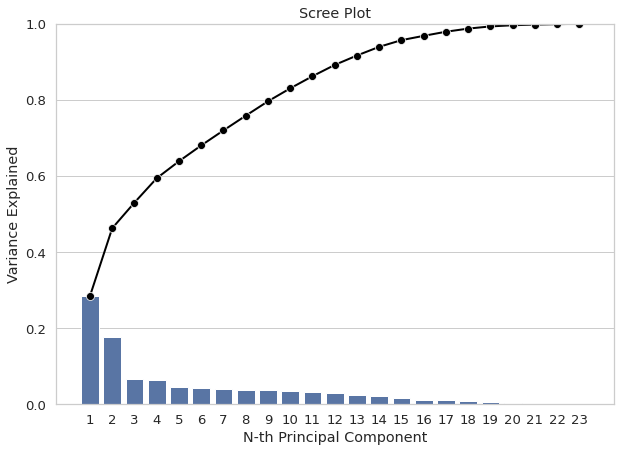

In [20]:
PC_components = np.arange(PCA_.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = PCA_.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(PCA_.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [21]:
PCA_.components_.round(4) #is the set of all eigenvectors for your projection space (one eigenvector for each principal component).

array([[ 6.850e-02, -2.160e-02,  1.920e-02, -5.600e-03,  1.430e-02,
         1.612e-01,  1.942e-01,  2.003e-01,  2.072e-01,  2.110e-01,
         2.064e-01,  3.344e-01,  3.458e-01,  3.497e-01,  3.538e-01,
         3.517e-01,  3.445e-01,  9.420e-02,  7.860e-02,  8.630e-02,
         7.780e-02,  7.530e-02,  6.990e-02],
       [ 3.164e-01,  3.020e-02, -9.150e-02, -4.300e-02,  6.670e-02,
        -2.983e-01, -3.349e-01, -3.438e-01, -3.445e-01, -3.315e-01,
        -3.057e-01,  1.399e-01,  1.403e-01,  1.463e-01,  1.455e-01,
         1.438e-01,  1.420e-01,  1.492e-01,  1.399e-01,  1.516e-01,
         1.414e-01,  1.371e-01,  1.294e-01],
       [ 1.730e-02,  2.430e-02, -3.166e-01,  4.537e-01, -4.630e-01,
        -1.740e-02,  1.780e-02,  6.150e-02,  8.870e-02,  1.086e-01,
         1.108e-01, -1.506e-01, -1.269e-01, -8.380e-02, -7.040e-02,
        -5.650e-02, -4.740e-02,  2.816e-01,  3.015e-01,  2.800e-01,
         2.372e-01,  1.939e-01,  2.090e-01],
       [ 6.950e-02, -7.810e-02,  2.465e-01, -4.43

In [22]:
pcsComponents_df = pd.DataFrame(PCA_.components_.transpose(), 
                                columns=['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23'],
                                index=['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23']
                                )
pcsComponents_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
X1,0.068513,0.316364,0.017300,0.069526,-0.150030,-0.375095,0.106564,-0.059519,0.021914,0.017330,...,-0.754050,-0.023626,0.042274,-0.025203,0.006678,0.006744,-0.009913,0.014487,-0.000593,0.002791
X2,-0.021586,0.030205,0.024284,-0.078109,0.883357,-0.396295,0.065237,-0.027989,0.019138,0.023981,...,0.113287,0.024815,-0.000051,0.021139,-0.003803,-0.001959,0.001847,-0.000676,-0.000753,0.000842
X3,0.019167,-0.091513,-0.316638,0.246490,0.365704,0.563608,-0.400609,0.080516,-0.156240,0.062782,...,-0.372845,-0.035950,0.009408,-0.040562,0.004313,0.002143,-0.002718,0.000573,0.001387,0.001729
X4,-0.005612,-0.043043,0.453725,-0.443931,-0.053225,0.280022,-0.160569,0.026316,-0.056505,0.038759,...,0.133794,0.005988,0.006225,-0.014323,-0.005581,-0.000788,-0.002457,-0.000212,0.000674,-0.001201
X5,0.014262,0.066656,-0.463023,0.462041,-0.164345,-0.088112,0.081440,-0.012669,0.047052,0.008012,...,0.432564,0.023856,0.001181,0.000629,-0.005668,-0.005878,0.000027,-0.001647,-0.000043,0.000245
X6,0.161183,-0.298260,-0.017384,0.016395,-0.035463,-0.039066,-0.086692,0.021131,-0.030753,0.003439,...,-0.097477,-0.608114,-0.241908,0.016553,0.135200,-0.033233,-0.005130,-0.000345,-0.002815,0.000229
X7,0.194171,-0.334879,0.017808,0.050119,-0.037997,-0.060660,-0.091881,0.015266,-0.033568,0.006629,...,-0.083438,0.321072,0.557960,-0.072472,-0.485691,0.139945,-0.031174,0.012696,0.003284,-0.000036
X8,0.200348,-0.343802,0.061514,0.084101,-0.023945,-0.069601,-0.020974,-0.026630,-0.011472,-0.024926,...,-0.084709,0.541667,-0.105790,-0.156934,0.606262,-0.306382,0.025349,-0.028055,-0.008498,-0.004812
X9,0.207166,-0.344508,0.088704,0.109227,-0.007883,-0.087272,0.039403,-0.056142,0.044599,-0.057006,...,-0.060638,0.171316,-0.585774,0.078044,-0.226059,0.567568,0.019202,0.001781,0.014011,-0.001437
X10,0.211029,-0.331488,0.108582,0.115438,0.001892,-0.087219,0.104041,-0.033713,0.054854,0.066757,...,-0.020726,-0.178438,-0.077398,0.145638,-0.385794,-0.674161,0.027168,0.023339,-0.008308,-0.000588


In [ ]:
pcsComponents_df.PC1.nlargest(3)